# Plot output

In [1]:
from pyhdx.fileIO import load_fitresult
from pyhdx.batch_processing import StateParser
import proplot as pplt
from pyhdx.plot import *
import yaml
from pathlib import Path

C:\Users\jhsmi\Miniconda3\envs\py38_pyhdx_01\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = Path() / '..' / '..' / 'tests' / 'test_data' / 'input'
output_dir = Path() / '..' / '..' / 'tests' / 'test_data' / 'output'
hdx_spec = yaml.safe_load(Path(data_dir / 'data_states.yaml').read_text())

hdx_spec['states']['SecB_tetramer']['peptides']['experiment']['query'] = ['exposure > 0.']

parser = StateParser(hdx_spec, data_src=data_dir)
hdxm = parser.load_hdxm(0)
hdxm

HDX Measurement:     SecB_tetramer<br><br>Number of peptides:         63<br>Number of residues:         145 (11 - 156)<br>Number of timepoints:       6<br>Timepoints:                 10.02, 30.00, 60.00, 300.00, 600.00, 6000.00 seconds<br>Coverage Percentage:        88.39<br>Average redundancy:         5.04   <br>Average peptide length:     11.89<br>Repeatability (mean std):   0.05 Da<br>Temperature:                303.15 K<br>pH:                         8.0             <br>

A figure of peptide coverage graphs showing RFU per peptide per exposure timepoint:


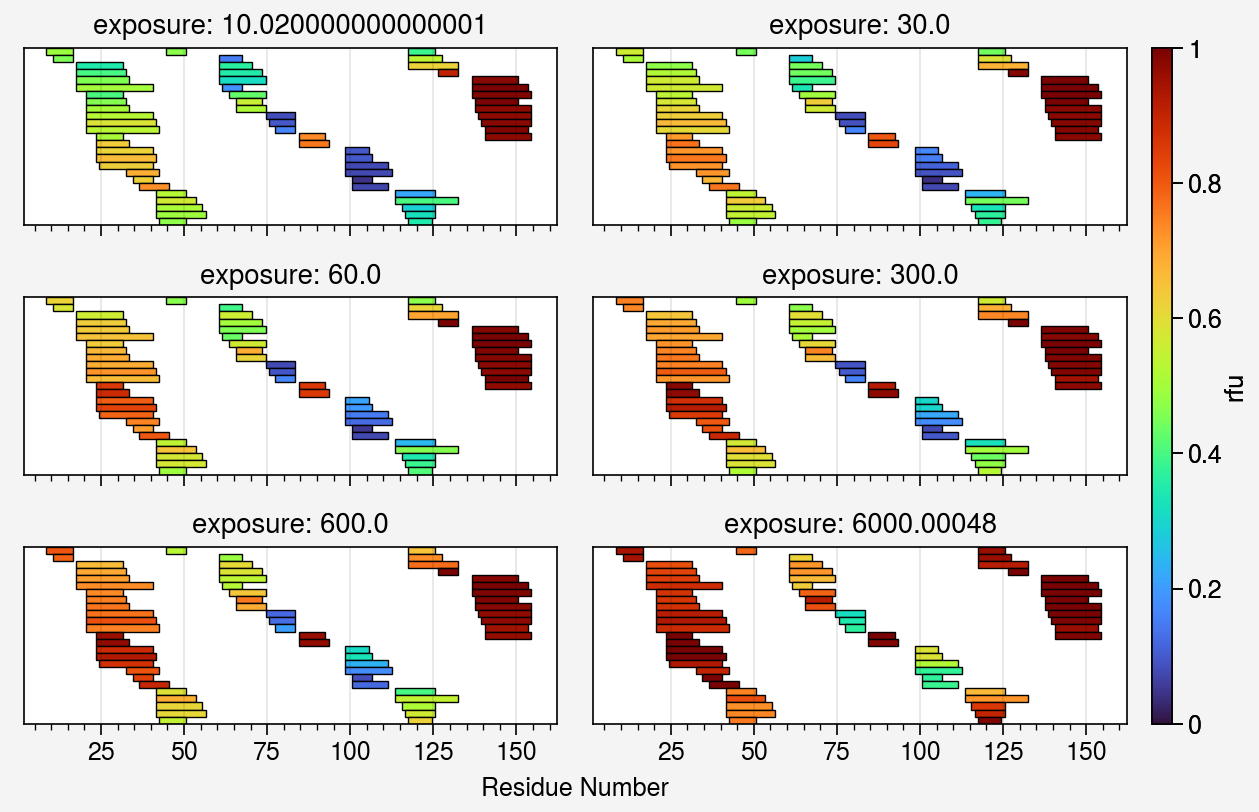

In [3]:
fig, axes, colorbar = peptide_coverage_figure(hdxm.data)

We can also make only a single plot of the peptide data, specifying which data field to use for the colors and
specifying a custom colormap and data range (norm):

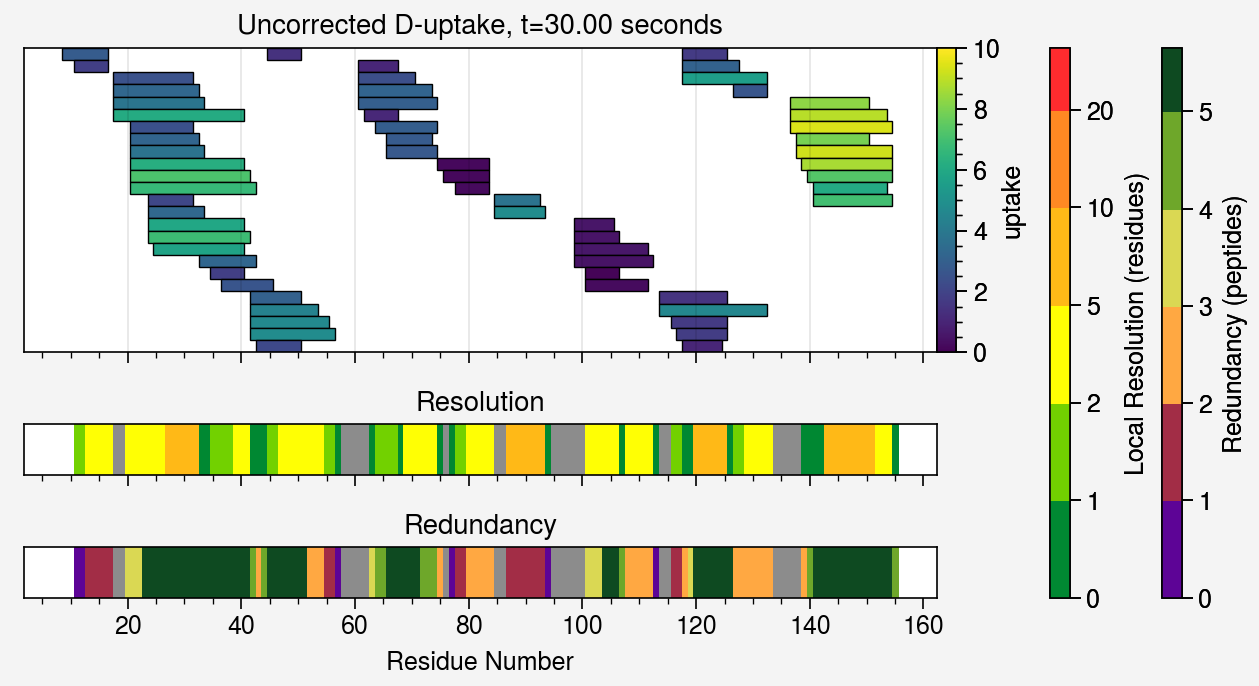

In [4]:
fig, axes = pplt.subplots(nrows=3, width='160mm', aspect=3, hratios=[6,1,1])
cbar = peptide_coverage(axes[0], hdxm[1].data, color_field='uptake',
                        cmap='viridis', norm=pplt.Norm('linear', 0, 10))
axes[0].format(xlabel='Residue Number', title=f'Uncorrected D-uptake, t={hdxm.timepoints[1]:.2f} seconds')
res = resolution(axes[1], hdxm)
red = redundancy(axes[2], hdxm)

kwargs = dict(width=CBAR_KWARGS['width'], extendsize=2.5, extendrect=True)
fig.colorbar(res, label='Local Resolution (residues)', **kwargs)
fig.colorbar(red, label='Redundancy (peptides)', **kwargs)

Scatterplots of RFUs per exposure time:

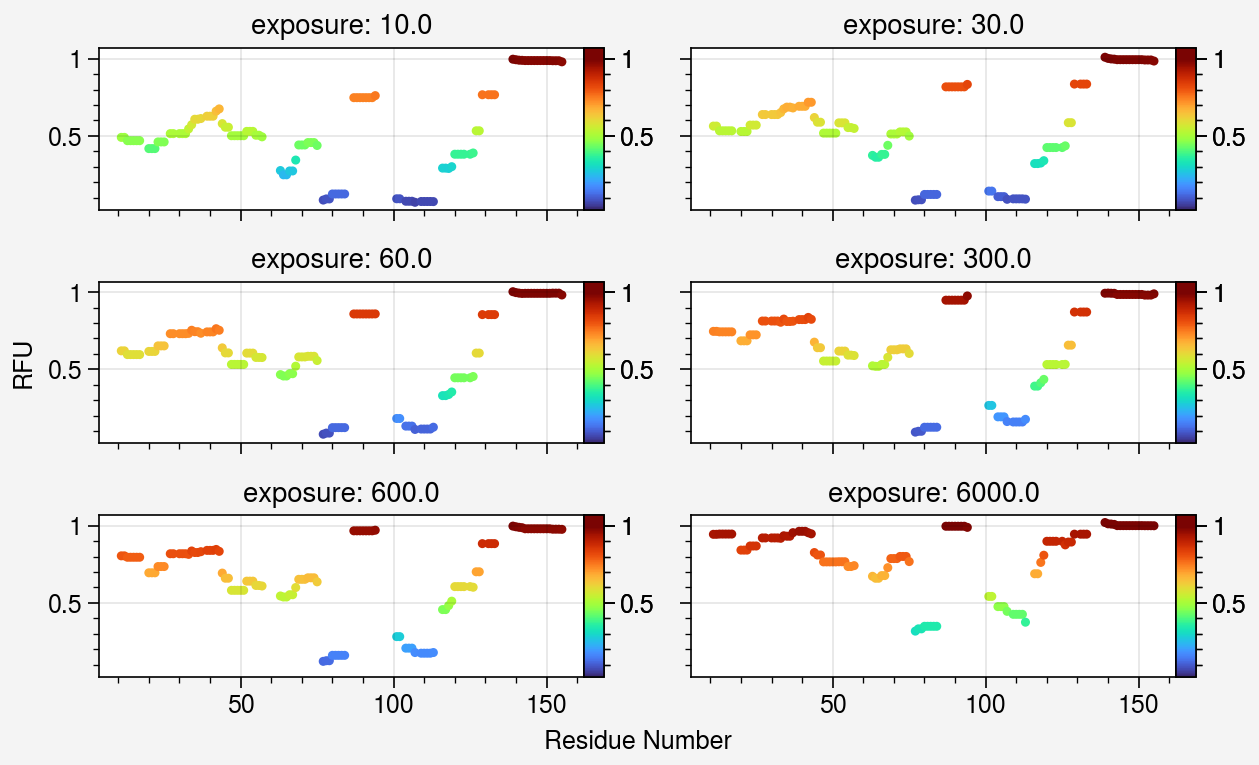

In [5]:
fig, axes, cbars = residue_time_scatter_figure(hdxm)
axes.format(ylabel='RFU')

Plot all exposure timepoints one one axis, with log scale colormap:

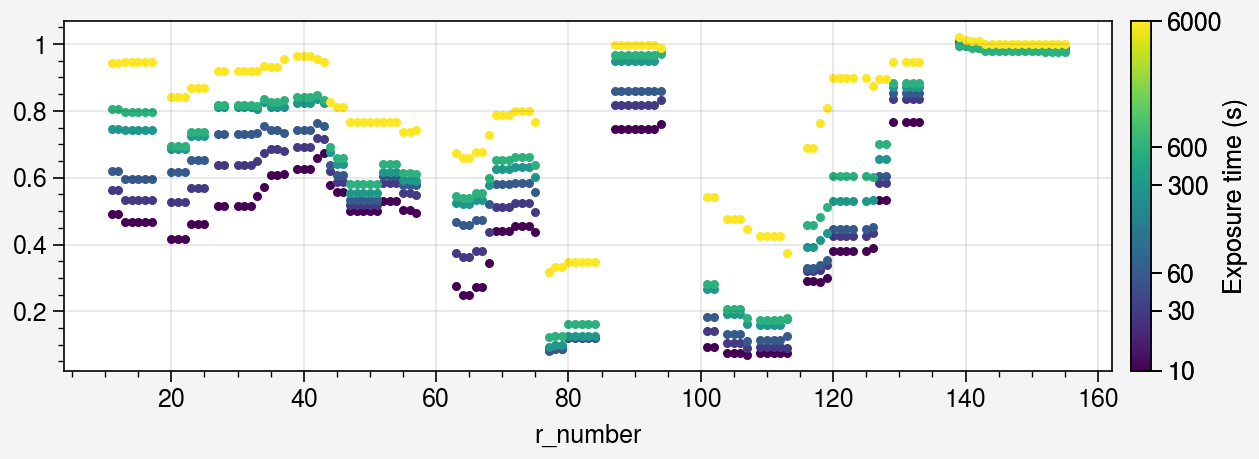

In [6]:
fig, ax = pplt.subplots(width='160mm', aspect=3)
residue_scatter(ax, hdxm)

Next we load a previous fit result to plot ΔG and ΔΔGs:

In [7]:
fitresult = load_fitresult(output_dir / 'ecsecb_tetramer_dimer')
fitresult.mse_loss, fitresult.total_loss

(0.3891798904093136, 0.712024122917819)

Plotting the resulting ΔG values. Error bars are covariances and optionally linear bars can be added next
to the graph showing residue-level mean squared errors.

There error are obtained from the final fit squared errors (per peptide per timepoint) which are then averaged in time
(resulting in peptide mean squared error) and subsequently reduced to residue level by weighted averaging.

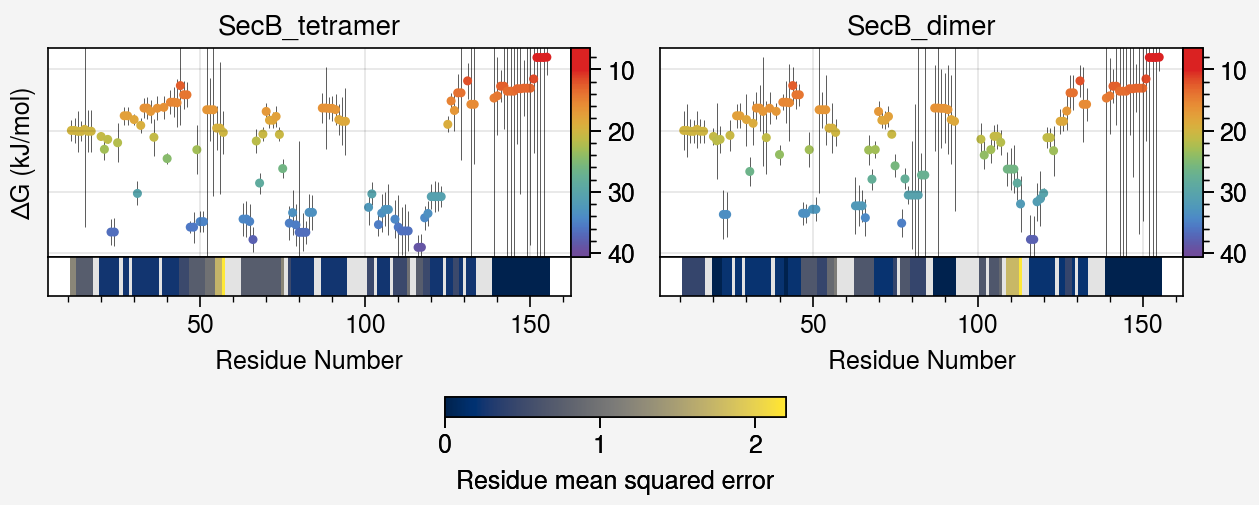

In [8]:
fig, axes, cbars = dG_scatter_figure(fitresult.output)
collections, cbar = add_mse_panels(axes, fitresult, fig=fig, cbar=True)
cbar.set_label('Residue mean squared error')

In [9]:
cfg.plotting.peptide_mse_aspect

3

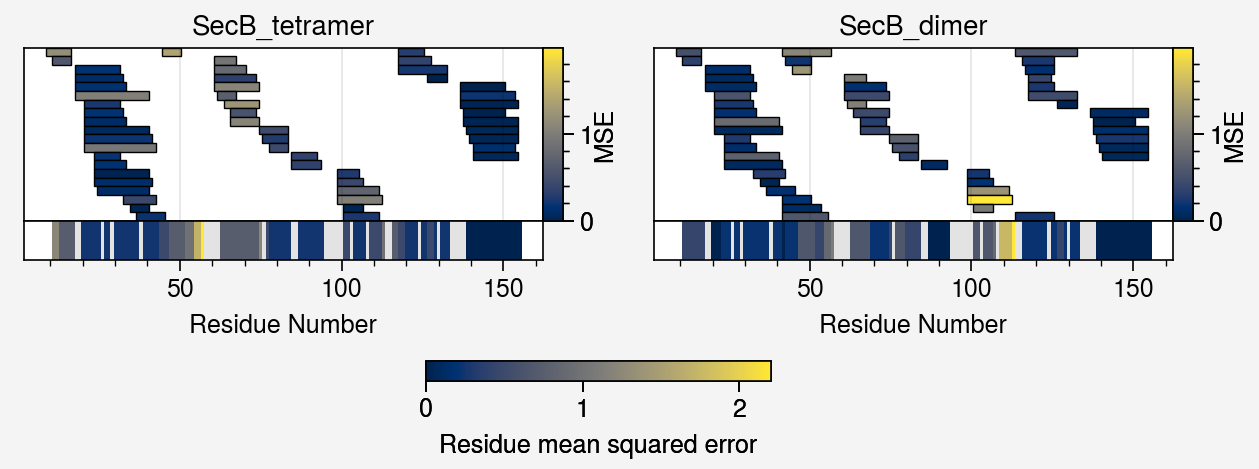

In [10]:
fig, axes, cbars = peptide_mse_figure(fitresult.get_peptide_mse())
collections, cbar = add_mse_panels(axes, fitresult, fig=fig, cbar=True)
cbar.set_label('Residue mean squared error')

Directly plotting ΔΔG values:

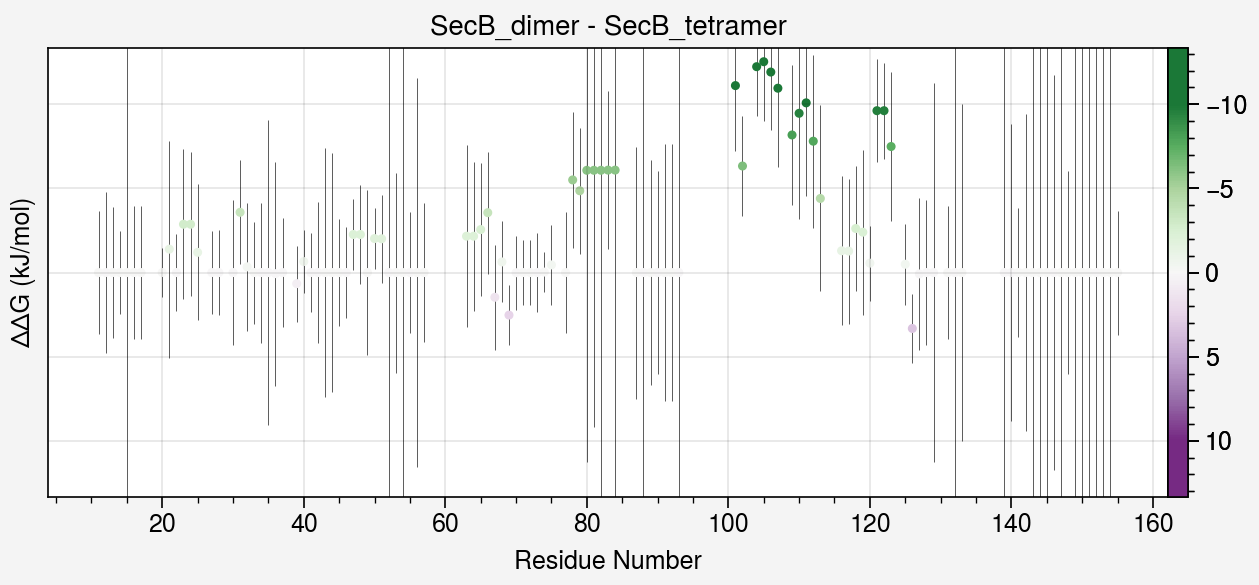

In [11]:
fig, axes, cbars = ddG_scatter_figure(fitresult.output, reference=0)

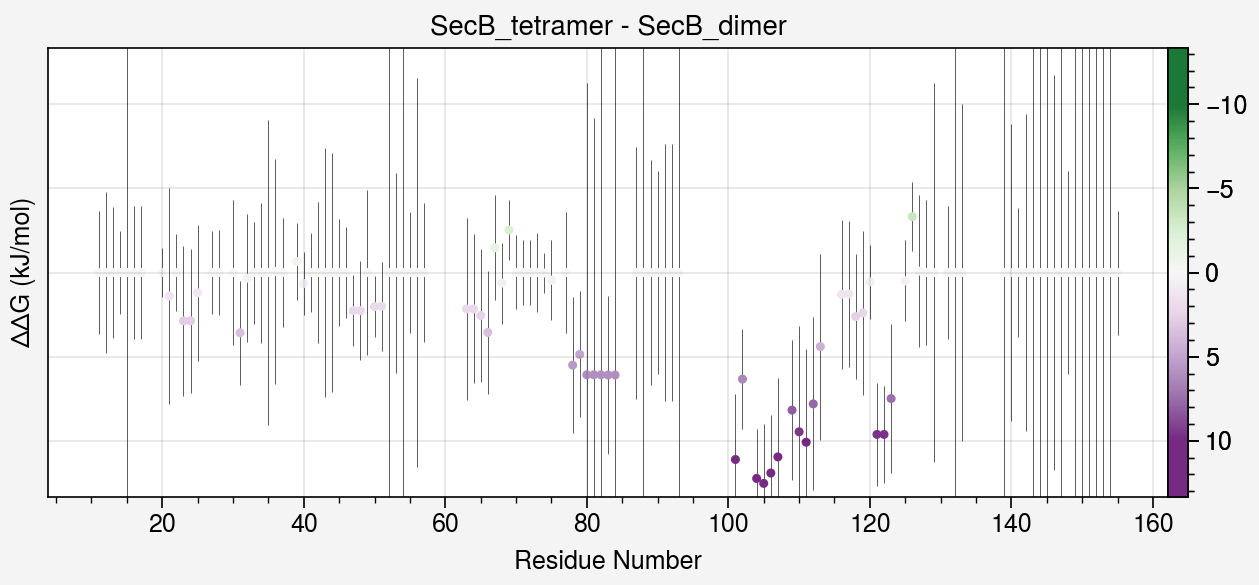

In [12]:
fig, axes, cbars = ddG_scatter_figure(fitresult.output, reference=1)


Using Panda's built-in plotting of dataframes:

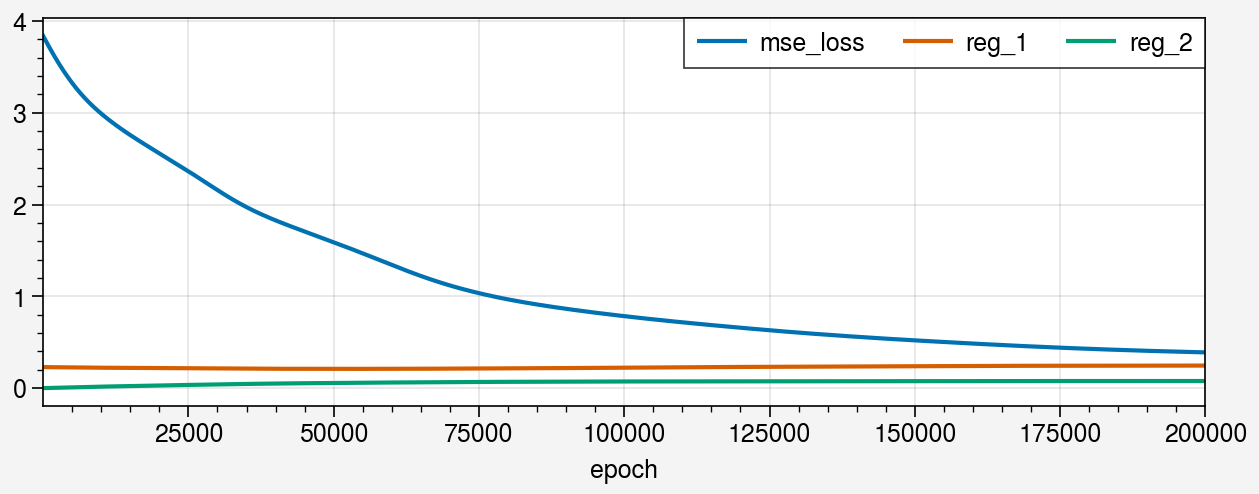

In [13]:
fig, ax = pplt.subplots(width='160mm', aspect=3)
ax = fitresult.losses.plot(ax=ax)

Plotting of the mean squared error of the fit per peptide for each fitted protein state:

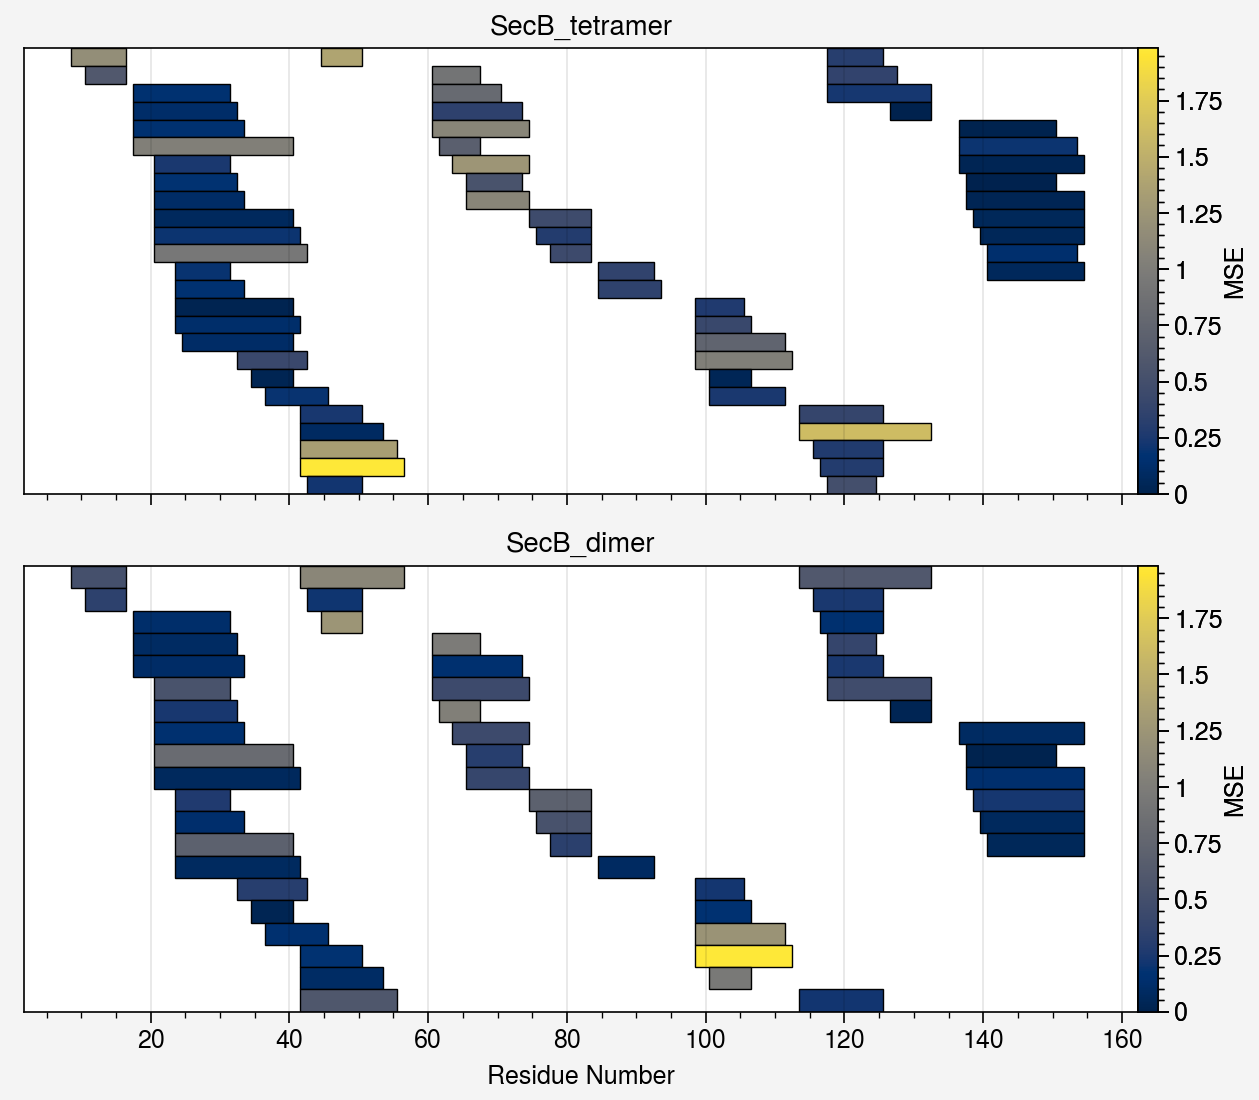

In [14]:
fig, axes, cbars = peptide_mse_figure(fitresult.get_peptide_mse(), aspect=2.5, ncols=1)